In [1]:
import os
import time
import requests
import pandas as pd
from zipfile import ZipFile
from io import BytesIO
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
combined_consolidated_df = pd.read_csv("df_final.csv")

In [4]:
# Detailed column stats sorted by non-null count (descending)
col_stats = pd.DataFrame({
    'non_null_count': combined_consolidated_df.notna().sum(),
    'null_count': combined_consolidated_df.isna().sum(),
    'unique_count': combined_consolidated_df.nunique(dropna=True)
}).sort_values('non_null_count', ascending=False)



In [5]:
combined_consolidated_df['surveyyear'].value_counts()

surveyyear
2018    98855
2023    89184
2019    88883
2021    83439
2022    73268
2024    65437
2020    64461
2016    56030
2017    51392
2025    49123
2015    26086
2013     9742
2014     7643
2012     6243
2011     2813
Name: count, dtype: int64

In [6]:
# Add percent of total rows for nulls (rounded to 2 decimals)
total_rows = combined_consolidated_df.shape[0]
col_stats['null_pct'] = (col_stats['null_count'] / total_rows * 100).round(2)

In [7]:
col_stats.head(50)

,non_null_count,null_count,unique_count,null_pct
Unnamed: 0,772599,0,772599,0.00
surveyyear,772599,0,15,0.00
gender,772599,0,7,0.00
country,722141,50458,265,6.53
employment,703968,68631,228,8.88
education,686412,86187,12,11.16
years_coding,637419,135180,78,17.50
age,624891,147708,94,19.12
programming_experience,582733,189866,203,24.57
developer_type,566667,205932,46652,26.65


In [8]:
print(sorted(combined_consolidated_df['surveyyear'].dropna().unique()))

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]


### Analyze by Country

#### Trend over time

In [9]:
# extract surveyyear and country and make a counts matrix
cols = ['surveyyear', 'country']
df_sub = combined_consolidated_df[cols].copy()

# drop rows missing either value
#df_sub = df_sub.dropna(subset=['surveyyear', 'country'])

# ensure surveyyear is treated consistently (optional)
# df_sub['surveyyear'] = df_sub['surveyyear'].astype(str)

# Create matrix: rows = surveyyear, cols = country, values = counts
matrix_df = pd.crosstab(df_sub['surveyyear'], df_sub['country']).sort_index()

# display and optionally save
display(matrix_df)


country,Afghanistan,Africa,Aland Islands,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica,Antigua & Deps,Antigua and Barbuda,Argentina,Armenia,Aruba,Australasia,Australia,Austria,Azerbaidjan,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Bouvet Island,Brazil,British Indian Ocean Territory,Brunei Darussalam,Bulgaria,Burkina,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,Central African Rep,Central African Republic,Central America,Chad,Chile,China,Christmas Island,Colombia,Comoros,"Congo, Republic of the...",Cook Islands,Costa Rica,Croatia,Cuba,Cyprus,Czech Republic,Côte d'Ivoire,Democratic People's Republic of Korea,Democratic Republic of the Congo,Denmark,Djibouti,Dominica,Dominican Republic,East Timor,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Falkland Islands,Fiji,Finland,France,French Guyana,Gabon,Gambia,Georgia,Germany,Ghana,Gibraltar,Greece,Grenada,Guam,Guatemala,Guinea,Guyana,Haiti,Heard and McDonald Islands,Honduras,Hong Kong,Hungary,I prefer not to say,Iceland,India,Indonesia,Iran,"Iran, Islamic Republic of...",Iraq,Ireland,Isle of Man,Israel,Italy,Ivory Coast,Ivory Coast (Cote D'Ivoire),Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Macau,Macedonia,Macedonia [FYROM],Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Martinique (French),Mauritania,Mauritius,Mexico,Micronesia,"Micronesia, Federated States of...",Middle East,Moldavia,Moldova,Monaco,Mongolia,Montenegro,Montserrat,Morocco,Mozambique,Myanmar,Myanmar [Burma],Namibia,Nauru,Nepal,Netherlands,Netherlands Antilles,New Caledonia (French),New Zealand,Nicaragua,Niger,Nigeria,Nomadic,North America (Other),North Korea,Northern Mariana Islands,Norway,Oman,Other,Other Asia,Other Europe,Pakistan,Palau,Palestine,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Pitcairn Island,Poland,Polynesia (French),Portugal,Puerto Rico,Qatar,Republic of Moldova,Republic of North Macedonia,Reunion (French),Romania,Russia,Russian Federation,Rwanda,S. Georgia & S. Sandwich Isls.,Saint Helena,Saint Kitts and Nevis,Saint Lucia,Saint Vincent & Grenadines,Saint Vincent and the Grenadines,Samoa,San Marino,Sao Tome & Principe,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovak Republic,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South America,South Korea,Spain,Sri Lanka,St Kitts & Nevis,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Tadjikistan,Taiwan,Tajikistan,Tanzania,Thailand,The former Yugoslav Republic of Macedonia,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Tuvalu,U.S. Minor Outlying Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Republic of Tanzania,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Vatican City,Venezuela,"Venezuela, Bolivarian Republic of...",Vietnam,Virgin Islands (British),Virgin Islands (USA),Yemen,Zaire,Zambia,Zimbabwe
surveyyear,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011,0,43,0,0,0,0,0,0,0,0,0,0,0,0,0,29,112,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,156,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,0,0,0,0,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,0,0,0,0,0,0,0,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,73,0,0,0,0,0,0,0,0,0,0,0,0,0,55,0,0,0,0,0,0,0,8,0,0,0,0,0,81,451,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,314,0,1037,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2012,0,92,0,0,0,0,0,0,0,0,0,0,0,0,0,105,185,0,0,0,0,0,15,0,0,0,0,0,0,

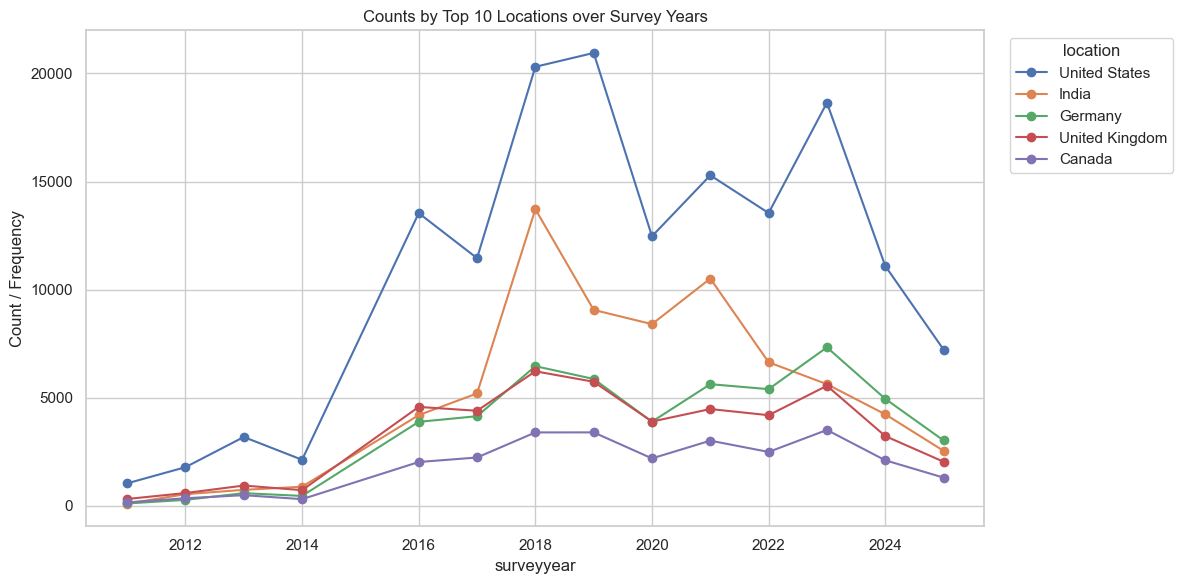

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# prepare a plotting-friendly copy (try numeric years first, otherwise keep strings)
matrix_plot = matrix_df.copy()
years_numeric = pd.to_numeric(matrix_plot.index, errors='coerce')
if years_numeric.notna().all():
    matrix_plot.index = years_numeric
matrix_plot = matrix_plot.sort_index()

# Select top 10 countries by total count
top_countries = matrix_plot.sum(axis=0).sort_values(ascending=False).head(5).index
matrix_plot_top = matrix_plot[top_countries]

sns.set(style='whitegrid')
ax = matrix_plot_top.plot(kind='line', figsize=(12,6), marker='o', linewidth=1.5)
ax.set_xlabel('surveyyear')
ax.set_ylabel('Count / Frequency')
ax.set_title('Counts by Top 10 Locations over Survey Years')
ax.legend(title='location', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()

# Save and show
plt.show()


#### Overall by country

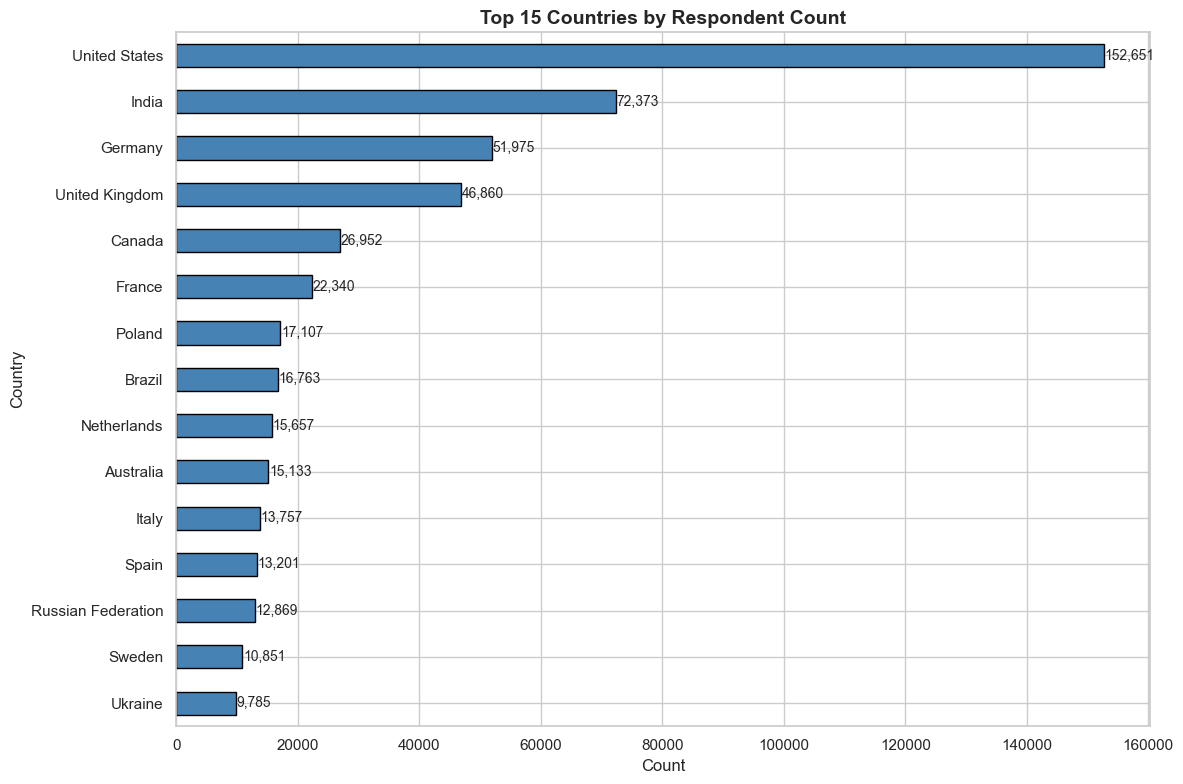

In [15]:
# Get country counts and select top 15
country_counts = combined_consolidated_df['country'].value_counts().head(15)

# Create bar chart
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')

ax = country_counts.plot(kind='barh', color='steelblue', edgecolor='black')
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Country', fontsize=12)
ax.set_title('Top 15 Countries by Respondent Count', fontsize=14, fontweight='bold')
ax.invert_yaxis()  # Highest count at the top

# Add value labels on bars
for i, v in enumerate(country_counts.values):
    ax.text(v + 100, i, f'{v:,}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

### Education Analysis

#### Trend for Education

In [11]:
# Create education by survey year matrix
cols = ['surveyyear', 'education']
df_edu = combined_consolidated_df[cols].copy()

# Create matrix: rows = surveyyear, cols = education, values = counts
education_matrix = pd.crosstab(df_edu['surveyyear'], df_edu['education']).sort_index()

display(education_matrix)

education,Professional degree,associate degree,bachelors,doctoral degree,i prefer not to say,less than college,masters,none,on the job training,other program,self-taught,some college
surveyyear,,,,,,,,,,,,
2016,0,0,18758,223,0,0,5370,0,932,408,18490,774
2017,715,0,29738,1308,1109,6955,11141,426,0,0,0,0
2018,0,2970,43659,3661,0,10607,21396,700,0,0,0,11710
2019,0,2938,39134,3630,0,10064,19569,553,0,0,0,10502
2020,0,1843,26542,2490,0,5712,13112,493,0,0,0,7239
2021,0,2231,35357,3823,0,12013,17512,0,0,1601,0,10589
2022,0,2236,30276,3290,0,9710,15486,0,0,1247,0,9326
2023,0,2807,36706,3887,0,10802,20543,0,0,1475,0,11753
2024,0,1793,24942,2970,0,6939,15557,0,0,932,0,7651


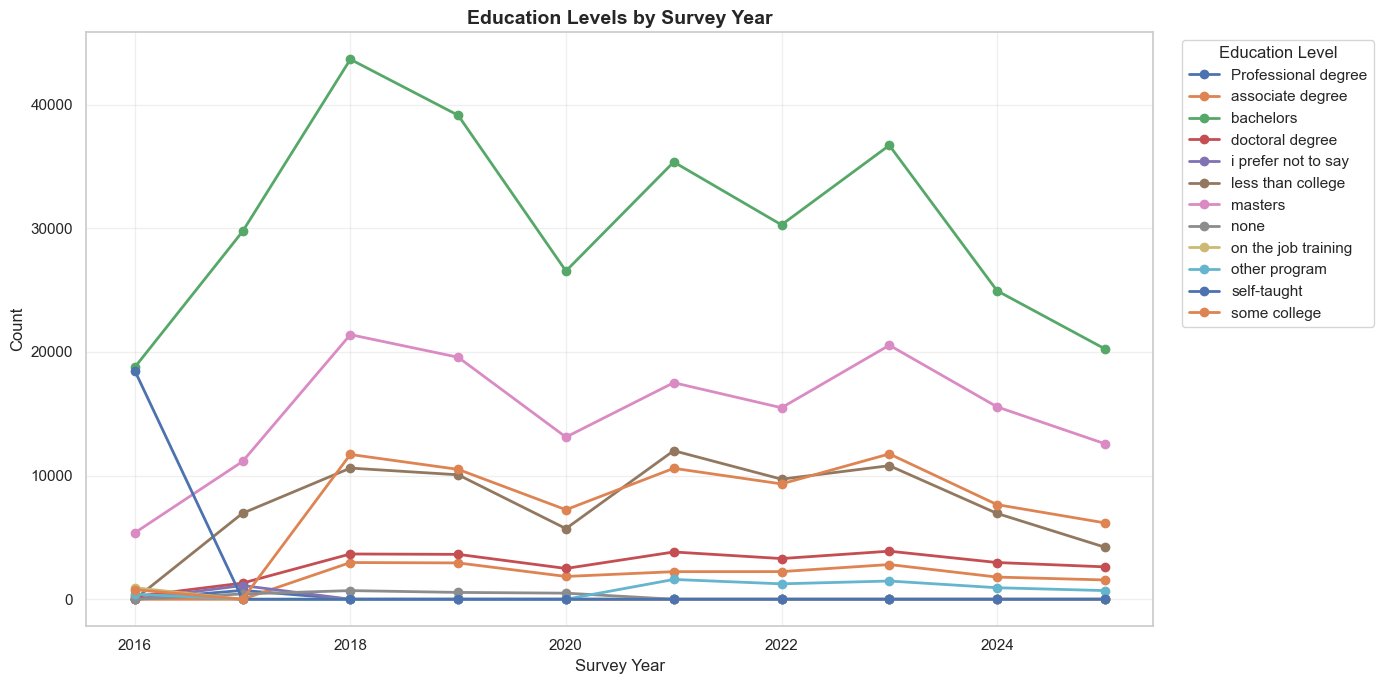

In [12]:
# Create line chart for education levels over time
education_plot = education_matrix.copy()

# Convert years to numeric if possible
years_numeric = pd.to_numeric(education_plot.index, errors='coerce')
#if years_numeric.notna().all():
#    education_plot.index = years_numeric
education_plot = education_plot.sort_index()

# Create the line chart
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(14, 7))

# Plot each education level
for col in education_plot.columns:
    ax.plot(education_plot.index, education_plot[col], marker='o', linewidth=2, label=col)

ax.set_xlabel('Survey Year', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Education Levels by Survey Year', fontsize=14, fontweight='bold')
ax.legend(title='Education Level', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### Overall education

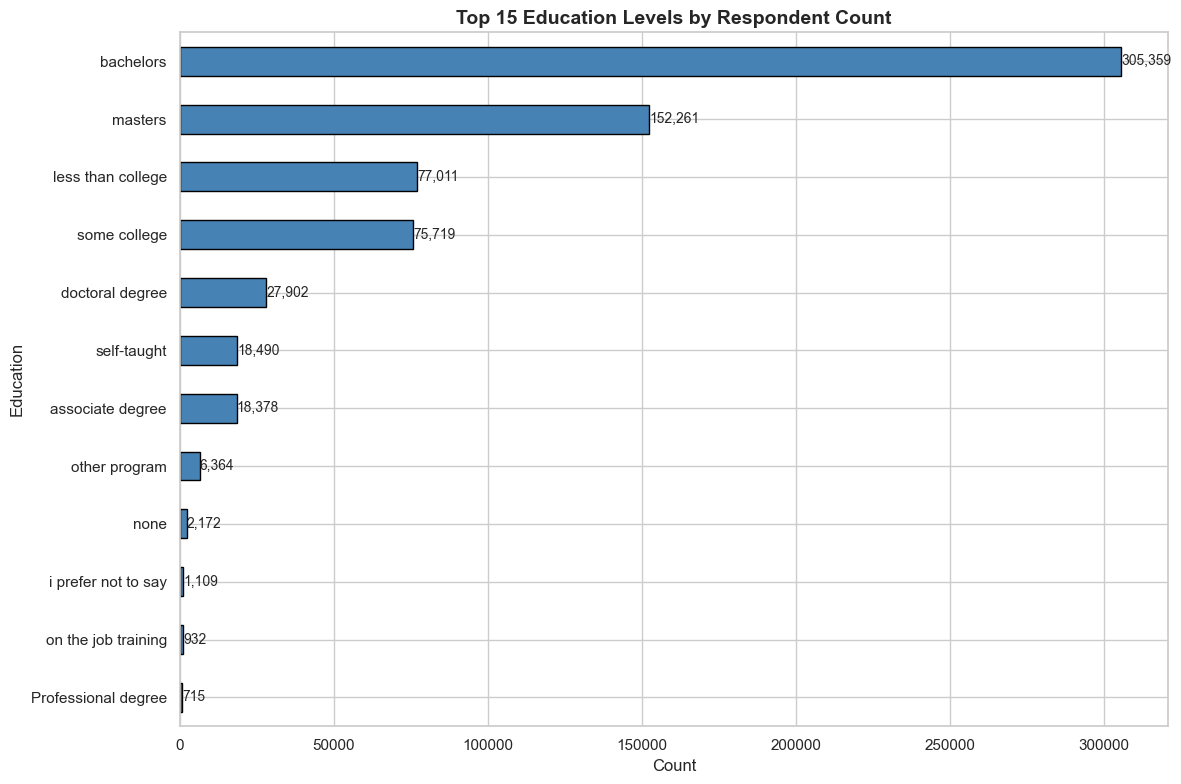

In [16]:
# Get country counts and select top 15
education_counts = combined_consolidated_df['education'].value_counts().head(15)

# Create bar chart
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')

ax = education_counts.plot(kind='barh', color='steelblue', edgecolor='black')
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Education', fontsize=12)
ax.set_title('Top 15 Education Levels by Respondent Count', fontsize=14, fontweight='bold')
ax.invert_yaxis()  # Highest count at the top

# Add value labels on bars
for i, v in enumerate(education_counts.values):
    ax.text(v + 100, i, f'{v:,}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

### Developer Type Analysis

#### Trend Analysis

In [13]:
# extract surveyyear and country and make a counts matrix
cols = ['surveyyear', 'developer_type_clean']
df_dev = combined_consolidated_df[cols].copy()

# Create matrix: rows = surveyyear, cols = country, values = counts
matrix_df_dev = pd.crosstab(df_dev['surveyyear'], df_dev['developer_type_clean']).sort_index()
# display and optionally save
display(matrix_df_dev)

developer_type_clean,back-end developer,cyber security,data role,data scientist,design,educator,engineering role,executive,front-end developer,full-stack developer,marketing or sales professional,other developer,other role,product/project manager,research role,retired,student,systems administrator
surveyyear,,,,,,,,,,,,,,,,,,
2017,0,0,140,846,13,0,109,0,0,0,0,33730,1174,0,0,0,0,113
2018,53300,0,3794,2211,2691,0,912,1195,5432,7384,91,10505,0,186,792,0,3300,305
2019,25991,0,11831,3108,5184,180,630,274,4886,12017,89,9012,0,193,6095,0,1561,284
2020,18142,0,7278,1936,2963,83,310,118,3213,6100,52,5282,0,95,3638,0,0,160
2021,8121,0,2650,1937,120,150,741,362,13397,16477,85,17445,2374,224,1150,0,975,276
2022,10491,184,2497,3424,90,320,2100,289,15375,16664,76,5527,1358,365,686,0,1662,194
2023,13745,797,2342,1588,281,415,3782,1332,5071,25735,149,11723,3080,1035,3058,0,1996,743
2024,9928,591,1812,1024,182,355,2419,837,3349,18260,96,9259,2458,708,2513,0,5102,552
2025,6446,369,1294,574,0,0,2529,527,1972,12339,0,9343,2254,507,1541,458,3003,480


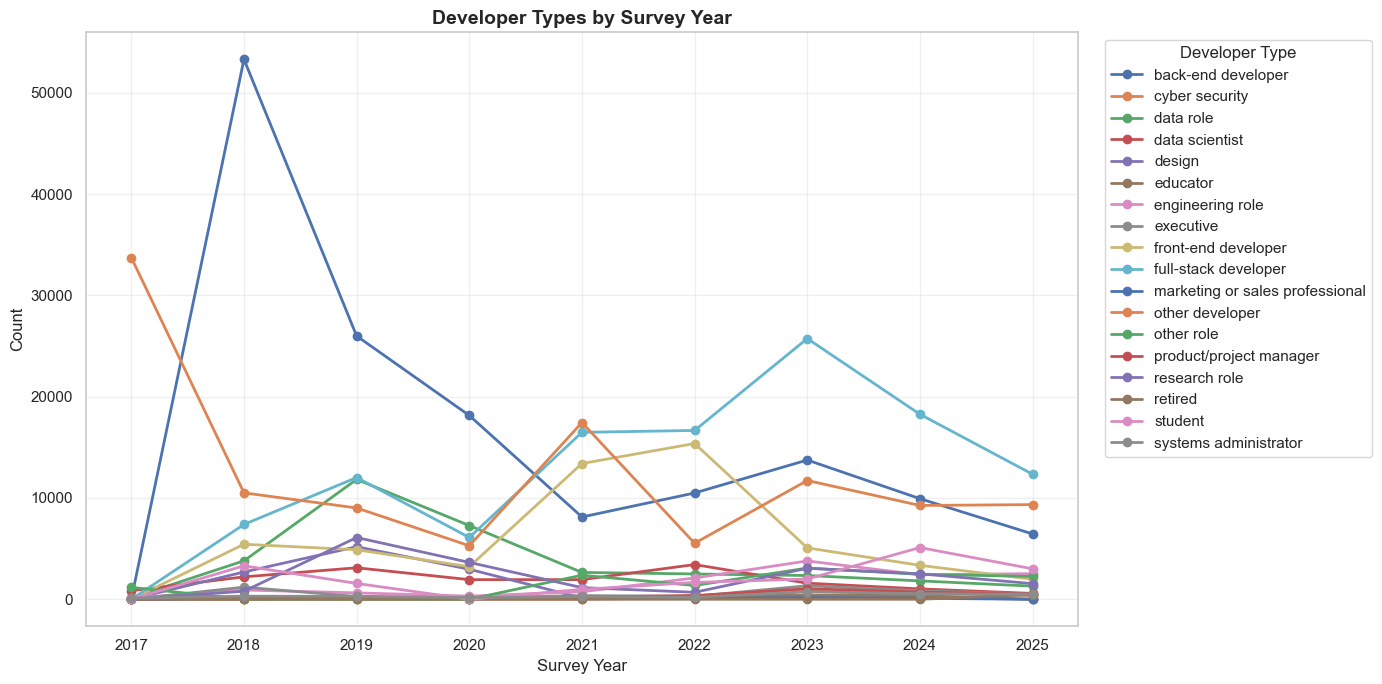

In [14]:
# Create line chart for education levels over time
dev_plot = matrix_df_dev.copy()

# Convert years to numeric if possible
years_numeric = pd.to_numeric(dev_plot.index, errors='coerce')
if years_numeric.notna().all():
    dev_plot.index = years_numeric
dev_plot = dev_plot.sort_index()

# Create the line chart
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(14, 7))

# Plot each education level
for col in dev_plot.columns:
    ax.plot(dev_plot.index, dev_plot[col], marker='o', linewidth=2, label=col)

ax.set_xlabel('Survey Year', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Developer Types by Survey Year', fontsize=14, fontweight='bold')
ax.legend(title='Developer Type', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### Overall Analysis

  File "/Users/chloe/Library/Python/3.11/lib/python/site-packages/IPython/core/completer.py", line 3626, in _complete
    result = matcher(context)
             ^^^^^^^^^^^^^^^^
  File "/Users/chloe/Library/Python/3.11/lib/python/site-packages/IPython/core/completer.py", line 2377, in magic_matcher
    global_matches = self.global_matches(bare_text)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/chloe/Library/Python/3.11/lib/python/site-packages/IPython/core/completer.py", line 1175, in global_matches
    for word in lst:
RuntimeError: dictionary changed size during iteration


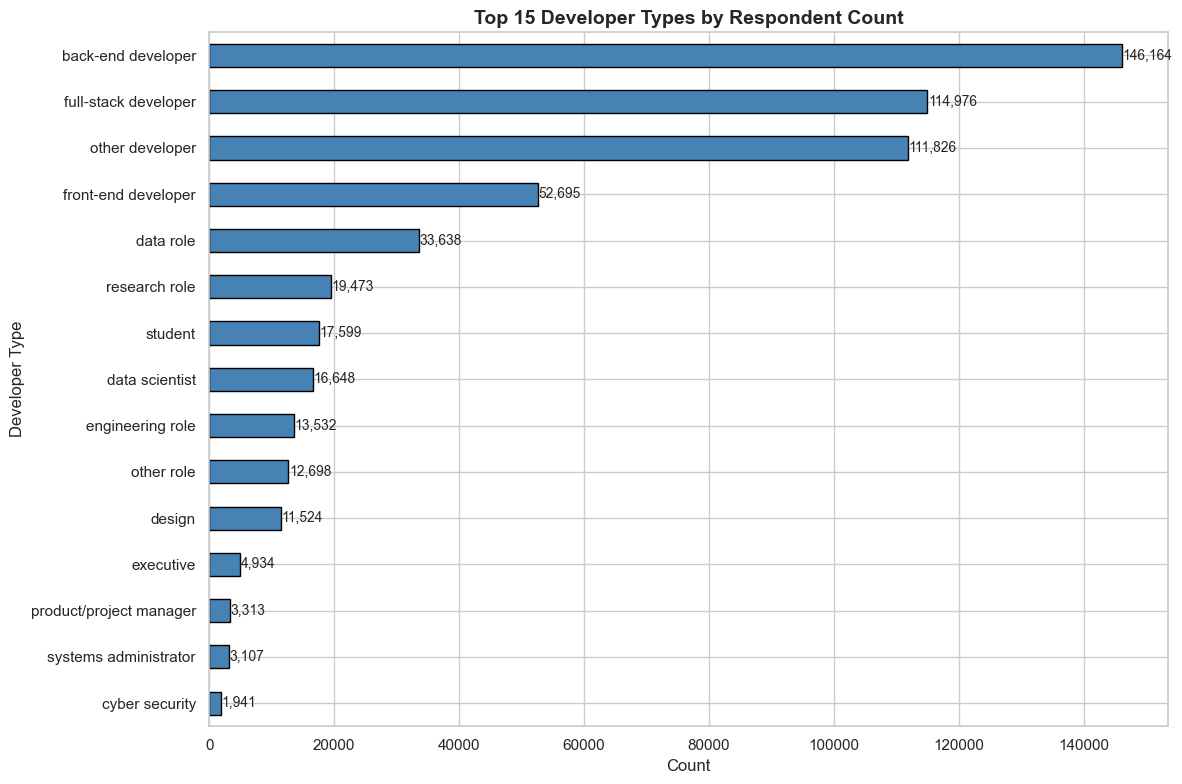

In [17]:
# Get country counts and select top 15
developer_counts = combined_consolidated_df['developer_type_clean'].value_counts().head(15)

# Create bar chart
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')

ax = developer_counts.plot(kind='barh', color='steelblue', edgecolor='black')
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Developer Type', fontsize=12)
ax.set_title('Top 15 Developer Types by Respondent Count', fontsize=14, fontweight='bold')
ax.invert_yaxis()  # Highest count at the top

# Add value labels on bars
for i, v in enumerate(developer_counts.values):
    ax.text(v + 100, i, f'{v:,}', va='center', fontsize=10)

plt.tight_layout()
plt.show()